In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# Set seaborn style for nicer plots
sns.set_theme(style="whitegrid")

In [2]:
# Load the data from the JSON file (adjust filename if needed)
filename = "kaggle_data_2025_03_07.json"
with open(filename, "r") as f:
    data = json.load(f)

# Let's inspect the first few entries to see the structure
data[:2]

[{'repository': 'docker-julia',
  'metrics': [['commits', 84],
   ['contributors', 6],
   ['branches', 1],
   ['tags', 0],
   ['releases', 0],
   ['stars', 36],
   ['forks', 12],
   ['environments', 0],
   ['closed issues', 3]],
  'languages': [['Julia', 70],
   ['BASH', 14],
   ['Dockerfile', 62],
   ['License', 169],
   ['Markdown', 1],
   ['Total', 316]]},
 {'repository': 'docker-python',
  'metrics': [['commits', 2430],
   ['contributors', 139],
   ['branches', 47],
   ['tags', 247],
   ['releases', 192],
   ['stars', 2517],
   ['forks', 971],
   ['environments', 0],
   ['closed issues', 353]],
  'languages': [['Python', 3617],
   ['BASH', 475],
   ['Dockerfile', 143],
   ['JSON', 164],
   ['Plain Text', 30747],
   ['CSV', 430],
   ['Markdown', 75],
   ['Jupyter', 75],
   ['Shell', 14],
   ['XML', 24317],
   ['Go Template', 176],
   ['License', 169],
   ['Smarty Template', 11],
   ['Total', 60413]]}]

In [3]:
# Each repository entry has a "repository" and a "metrics" list (list of tuples)
# We want to convert the "metrics" list into a dictionary, then into a DataFrame

# Define the metric keys we are interested in:
metric_keys = ['commits', 'stars', 'contributors', 'branches', 'tags', 'releases', 'forks', 'closed issues', 'environments']

rows = []
for repo_entry in data:
    repo_name = repo_entry.get("repository", "")
    # Convert metrics list of tuples to dict
    metrics = dict(repo_entry.get("metrics", []))
    # Make sure all keys are present (fill missing ones with 0)
    row = {"repository": repo_name}
    for key in metric_keys:
        row[key] = metrics.get(key, 0)
    rows.append(row)

# Create a DataFrame from the list of rows
df_metrics = pd.DataFrame(rows)
df_metrics.set_index("repository", inplace=True)
df_metrics.head()

,commits,stars,contributors,branches,tags,releases,forks,closed issues,environments
repository,,,,,,,,,
docker-julia,84,36,6,1,0,0,12,3,0
docker-python,2430,2517,139,47,247,192,971,353,0
docker-rstats,439,143,18,2,93,74,90,38,0
pipelinehelpers,2,7,1,1,0,0,6,0,0
docker-rcran,500,19,9,8,0,0,15,3,0


In [4]:
# Compute total, median, mean, and standard deviation for each metric
totals = df_metrics.sum()
medians = df_metrics.median()
means = df_metrics.mean()
std_devs = df_metrics.std()

# Combine these into a single DataFrame for easier display
stats_df = pd.DataFrame({
    "Total": totals,
    "Median": medians,
    "Mean": means,
    "Std Dev": std_devs
})

stats_df

,Total,Median,Mean,Std Dev
commits,7094,212.0,591.166667,931.747316
stars,10223,93.0,851.916667,1908.317796
contributors,303,12.5,25.250000,38.680803
branches,221,5.5,18.416667,24.377554
tags,426,1.0,35.500000,72.325652
releases,306,0.0,25.500000,56.659269
forks,2680,26.0,223.333333,395.575837
closed issues,818,6.5,68.166667,132.991342
environments,0,0.0,0.000000,0.000000


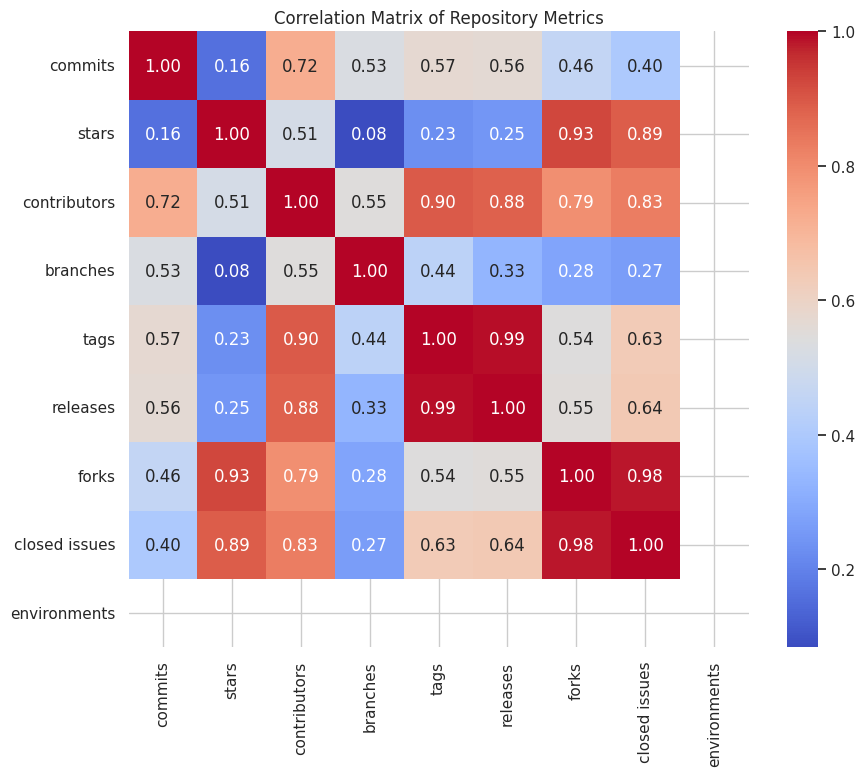

In [5]:
# Compute and display a correlation matrix to see relationships between metrics
corr_matrix = df_metrics.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Repository Metrics")
plt.show()

# High Correlation Relationship
- Stars and Forks: with a correlation metric of 0.93. Indicating a strong linear relationship between the two. A repository with a high number of stars will also have many forks. This is pretty intuitive, a repository that is starred meaning lots of people like it, also tend to attract people who would like to modify and build upon that same codebase.

In [6]:
# Let's rank the repositories by the number of stars
ranking = df_metrics.sort_values(by="stars", ascending=False)
print("Top 5 Repositories by Stars:")
print(ranking.head(5))

Top 5 Repositories by Stars:
                     commits  stars  contributors  branches  tags  releases  \
repository                                                                    
kaggle-api               240   6485            45        10     8         8   
docker-python           2430   2517           139        47   247       192   
learntools              2649    465            32        36     2         0   
kaggle-environments      528    318            32        75    43         6   
kagglehub                184    189            16        36    33        26   

                     forks  closed issues  environments  
repository                                               
kaggle-api            1131            349             0  
docker-python          971            353             0  
learntools             252             15             0  
kaggle-environments    156             46             0  
kagglehub               37             10             0  


In [7]:
# For each repository, analyze the language usage values (excluding "Total")
for repo in data:
    lang_values = [lang[1] for lang in repo['languages'] if lang[0] != "Total"]
    print(f"Repository: {repo['repository']}")
    print("  Mean of language values:", np.mean(lang_values))
    print("  Median of language values:", np.median(lang_values))
    print("  Standard Deviation of language values:", np.std(lang_values))
    print("")

Repository: docker-julia
  Mean of language values: 63.2
  Median of language values: 62.0
  Standard Deviation of language values: 59.212836446162584

Repository: docker-python
  Mean of language values: 4647.153846153846
  Median of language values: 169.0
  Standard Deviation of language values: 9882.220459345188

Repository: docker-rstats
  Mean of language values: 112.1
  Median of language values: 41.0
  Standard Deviation of language values: 142.8386852361782

Repository: pipelinehelpers
  Mean of language values: 70.0
  Median of language values: 70.0
  Standard Deviation of language values: 0.0

Repository: docker-rcran
  Mean of language values: 176.0
  Median of language values: 139.5
  Standard Deviation of language values: 170.25079539706513

Repository: kaggle-api
  Mean of language values: 3687.230769230769
  Median of language values: 113.0
  Standard Deviation of language values: 10916.658886968939

Repository: learntools
  Mean of language values: 53835.375
  Median of

In [8]:
# Aggregate total lines of code for each language (excluding non-code items)
language_totals = {}
for repo in data:
    for lang, value in repo['languages']:
        language_totals[lang] = language_totals.get(lang, 0) + value

# Sort the languages by highest total lines of code
sorted_languages = sorted(language_totals.items(), key=lambda x: x[1], reverse=True)

print("Unique programming languages sorted by total lines of code:")
for lang, total in sorted_languages:
    print(f"{lang}: {total}")

Unique programming languages sorted by total lines of code:
Total: 639453
CSV: 329830
Jupyter: 135819
Python: 91842
Plain Text: 31579
XML: 24341
JavaScript: 6985
Markdown: 4670
TypeScript: 2980
License: 2197
JSON: 1905
Shell: 1789
Java: 1608
BASH: 820
R: 728
HTML: 726
YAML: 621
Dockerfile: 430
TOML: 249
Go Template: 176
Julia: 70
Smarty Template: 22
Docker ignore: 17
SVG: 17
Autoconf: 14
CSS: 11
ReStructuredText: 4
JSONL: 3


In [9]:
# Assuming your data has already been loaded into the variable `data`
# Define non-code entries to exclude from the analysis.
non_code = {"License", "Markdown", "Total", "Dockerfile", "Go Template", "Smarty Template"}

# Dictionary to hold a list of source code lines per language across repositories.
language_stats = {}

for repo in data:
    for lang, value in repo['languages']:
        # Exclude non-code items.
        if lang in non_code:
            continue
        if lang not in language_stats:
            language_stats[lang] = []
        language_stats[lang].append(value)

# Calculate the total and median lines of code for each programming language.
results = []
for lang, counts in language_stats.items():
    total_lines = sum(counts)
    median_lines = statistics.median(counts)
    results.append((lang, total_lines, median_lines))

# Create a DataFrame for nicer output and sort by total lines in descending order.
df = pd.DataFrame(results, columns=["Programming Language", "Total Lines", "Median Lines"])
df = df.sort_values(by="Total Lines", ascending=False)

print("Total and median number of source code lines per programming language:")
print(df)

Total and median number of source code lines per programming language:
   Programming Language  Total Lines  Median Lines
5                   CSV       329830         430.0
6               Jupyter       135819          75.0
2                Python        91842       13542.5
4            Plain Text        31579         258.0
8                   XML        24341       12170.5
17           JavaScript         6985        3492.5
14           TypeScript         2980        1490.0
3                  JSON         1905         114.5
7                 Shell         1789         299.0
19                 Java         1608        1608.0
1                  BASH          820         165.5
9                     R          728         197.0
20                 HTML          726         726.0
10                 YAML          621         111.5
13                 TOML          249         124.5
0                 Julia           70          70.0
18                  SVG           17          17.0
16        D